<h1 style="color:red;">Fecha entrega: Viernes 11 Abril 2025 - maximo 8:00PM</h1>

# Taller 3 - Deep Learning

Fuente: tutoriales de tensorflow.org, keras classification

# Introduccion

La anterior clase exploramos los temas relacionados al Perceptron, en este taller a modo de continuacion y de forma practica, vamos a ver "Redes neuronales"

Aunque un Perceptron (unica neurona) es útil para resolver problemas simples de clasificación (como AND o OR), el perceptrón no puede resolver problemas no lineales, como la compuerta lógica XOR. Aquí es donde entra el siguiente paso evolutivo.

Para superar las limitaciones del perceptrón simple, se conectan varias neuronas en capas:

<img src="https://i.ytimg.com/vi/aircAruvnKk/maxresdefault.jpg">

### ¿Por qué son más poderosas las redes neuronales?

Una sola neurona (perceptrón) solo puede aprender funciones lineales.

Al tener múltiples capas y funciones de activación no lineales (como ReLU, tanh, etc.), las redes pueden aprender patrones complejos y no lineales.

Se pueden aplicar a tareas como reconocimiento de imágenes, voz, lenguaje natural, etc.

### 🏗️ Estructura típica:

Capa de entrada: donde entran los datos (como pixeles de una imagen o características de un objeto).

Capas ocultas: aquí está la magia. Las neuronas procesan los datos de forma más compleja. Puedes tener una o muchas capas ocultas.

Capa de salida: da el resultado final (por ejemplo, "es un gato" o "es un perro").

### 🔄 ¿Cómo funciona?

Cada neurona en una capa está conectada a todas las neuronas de la siguiente capa.

Cada conexión tiene un peso ajustable.

Durante el entrenamiento, el algoritmo ajusta los pesos para minimizar el error, usando técnicas como backpropagation y descenso del gradiente

# Seguir los pasos de este taller, y responder las preguntas al final

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. No hay problema sino entiende todos los detalles; es un repaso rapido de un programa completo de Tensorflow con los detalles explicados a medida que avanza.

Esta Guia usa tf.keras, un API de alto nivel para construir y entrenar modelos en Tensorflow.

# Importar los datos

In [5]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# Explorar los datos

Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de Fashion MNIST que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

Moda MNIST esta construida como un reemplazo para el set de datos clasico MNIST casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al cargar el set de datos retorna cuatro arreglos en NumPy:

El arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.
el modelo es probado contra los arreglos test set, el test_images, y test_labels.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.

Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:


In [10]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

for i in range(len(class_names)):
    print(i," -> ",class_names[i])

0  ->  T-shirt/top
1  ->  Trouser
2  ->  Pullover
3  ->  Dress
4  ->  Coat
5  ->  Sandal
6  ->  Shirt
7  ->  Sneaker
8  ->  Bag
9  ->  Ankle boot


Train images:  (60000, 28, 28)
Train labels:  (60000,)


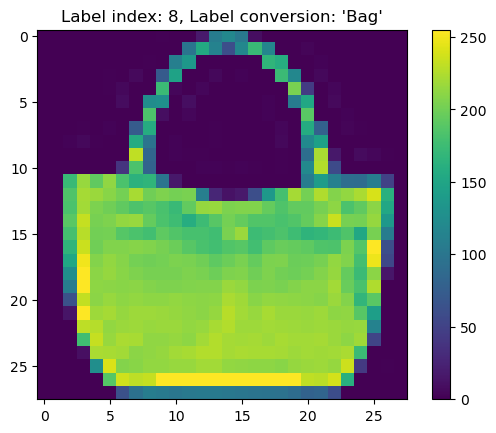

In [11]:
# train images and labels

IMAGE_INDEX = 100

print("Train images: ",train_images.shape)
print("Train labels: ",train_labels.shape)

plt.figure()
plt.title(f"Label index: {train_labels[IMAGE_INDEX]}, Label conversion: '{class_names[train_labels[IMAGE_INDEX]]}'")
plt.imshow(train_images[IMAGE_INDEX])
plt.colorbar()
plt.grid(False)
plt.show()

Train images:  (10000, 28, 28)
Train labels:  (10000,)


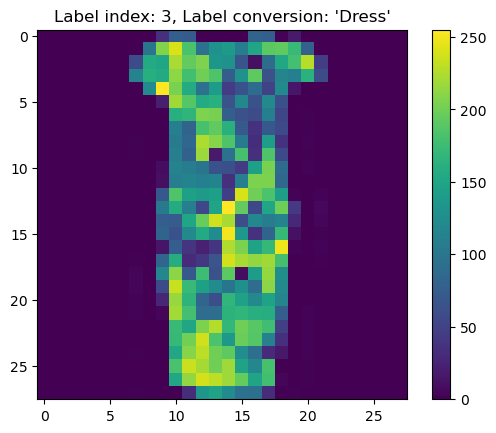

In [12]:
# test image and labels

IMAGE_INDEX = 100

print("Train images: ",test_images.shape)
print("Train labels: ",test_labels.shape)

plt.figure()
plt.title(f"Label index: {test_labels[IMAGE_INDEX]}, Label conversion: '{class_names[test_labels[IMAGE_INDEX]]}'")
plt.imshow(test_images[IMAGE_INDEX])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

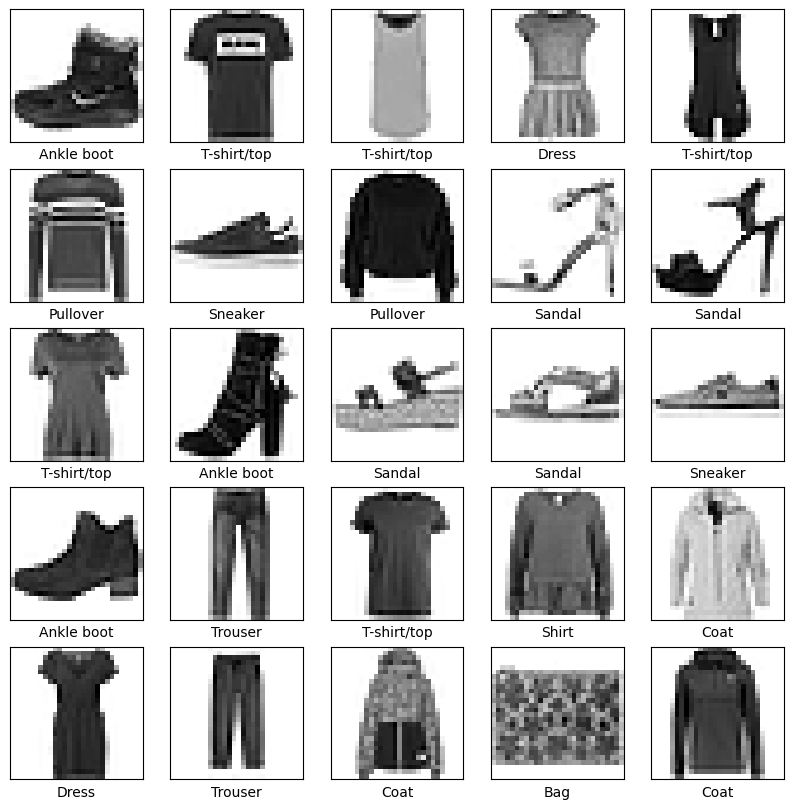

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Configurar las Capas
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [18]:
# ignorar el warning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\Memo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

Compile el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

- Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
- Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
- Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y train_labels.

2. El modelo aprende a asociar imagenes y etiquetas.

3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images. Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.

Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7828 - loss: 0.6281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8614 - loss: 0.3851
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.3396
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8851 - loss: 0.3146
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 0.2954
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9003 - loss: 0.2674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9071 - loss: 0.2504
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9091 - loss: 0.2419
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.2339


A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

# Evaluar Exactitud

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8793 - loss: 0.3425

Test accuracy: 0.8792999982833862


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

# Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.



In [28]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera prediccion: TEST_IMAGE_INDEX = 0

In [30]:
TEST_IMAGE_INDEX = 0

In [31]:
predictions[TEST_IMAGE_INDEX]

array([1.36225736e-07, 1.04658476e-07, 1.52585589e-08, 3.42568605e-08,
       1.35363436e-08, 8.57078179e-04, 1.00722431e-07, 5.43310232e-02,
       6.09526796e-06, 9.44805443e-01], dtype=float32)

In [32]:
for i in range(len(predictions[TEST_IMAGE_INDEX])):
    print(f"{predictions[0][i]*100:.2f}% -> Tag: {class_names[i]}")

0.00% -> Tag: T-shirt/top
0.00% -> Tag: Trouser
0.00% -> Tag: Pullover
0.00% -> Tag: Dress
0.00% -> Tag: Coat
0.09% -> Tag: Sandal
0.00% -> Tag: Shirt
5.43% -> Tag: Sneaker
0.00% -> Tag: Bag
94.48% -> Tag: Ankle boot


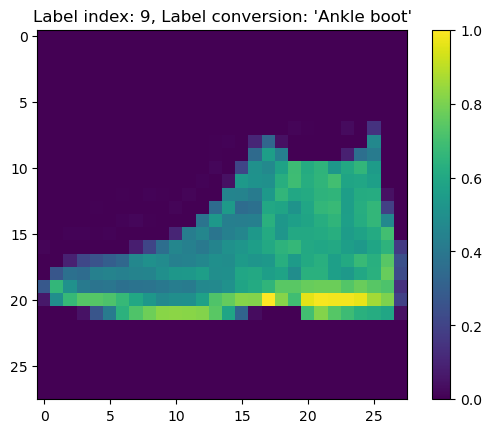

In [33]:
plt.figure()
plt.title(f"Label index: {test_labels[TEST_IMAGE_INDEX]}, Label conversion: '{class_names[test_labels[TEST_IMAGE_INDEX]]}'")
plt.imshow(test_images[TEST_IMAGE_INDEX])
plt.colorbar()
plt.grid(False)
plt.show()

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [35]:
np.argmax(predictions[0])

9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o class_names[9]. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [37]:
test_labels[0]

9

Grafique esto para poder ver todo el set de la prediccion de las 10 clases.

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos algunas imagenes, sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

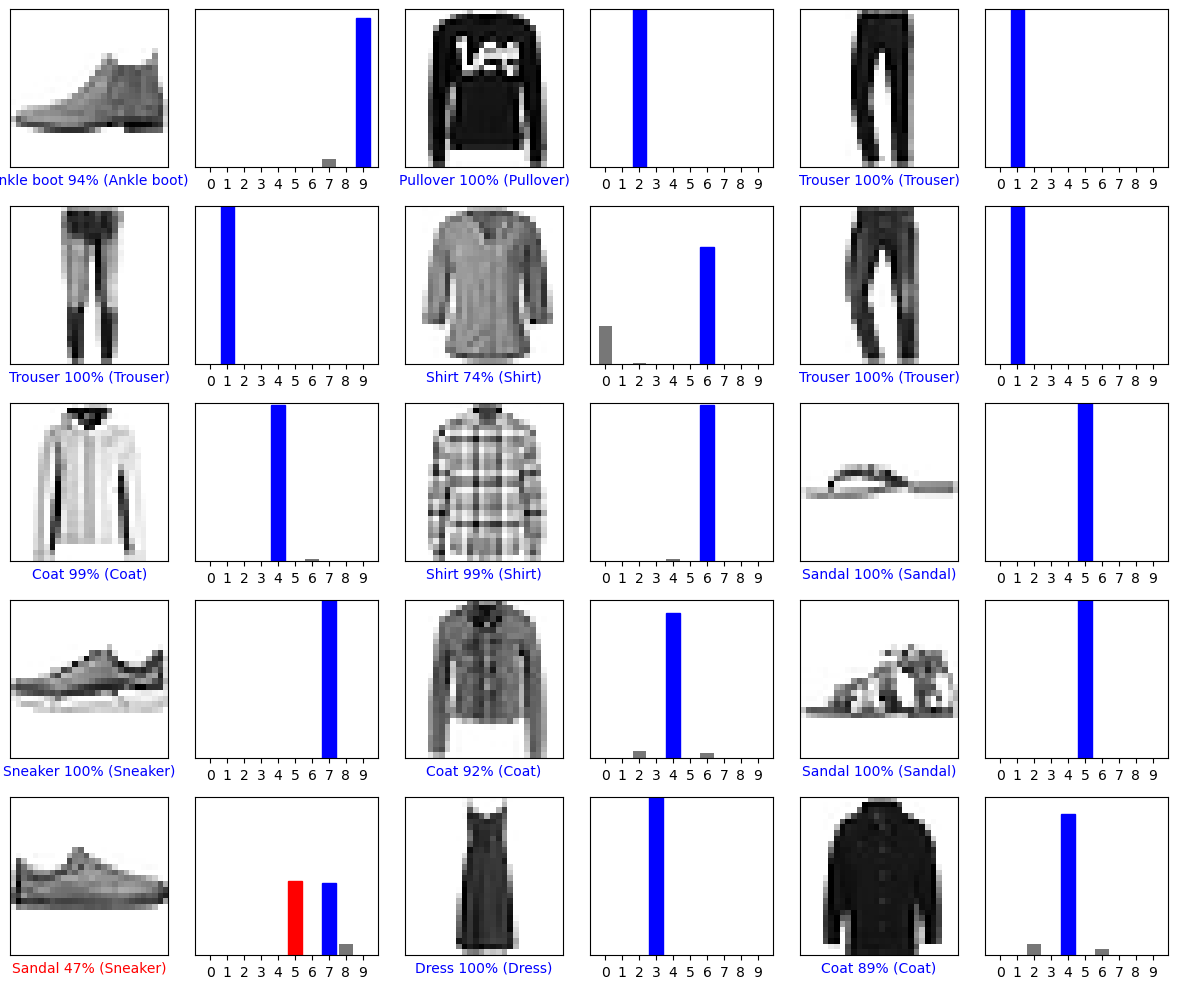

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

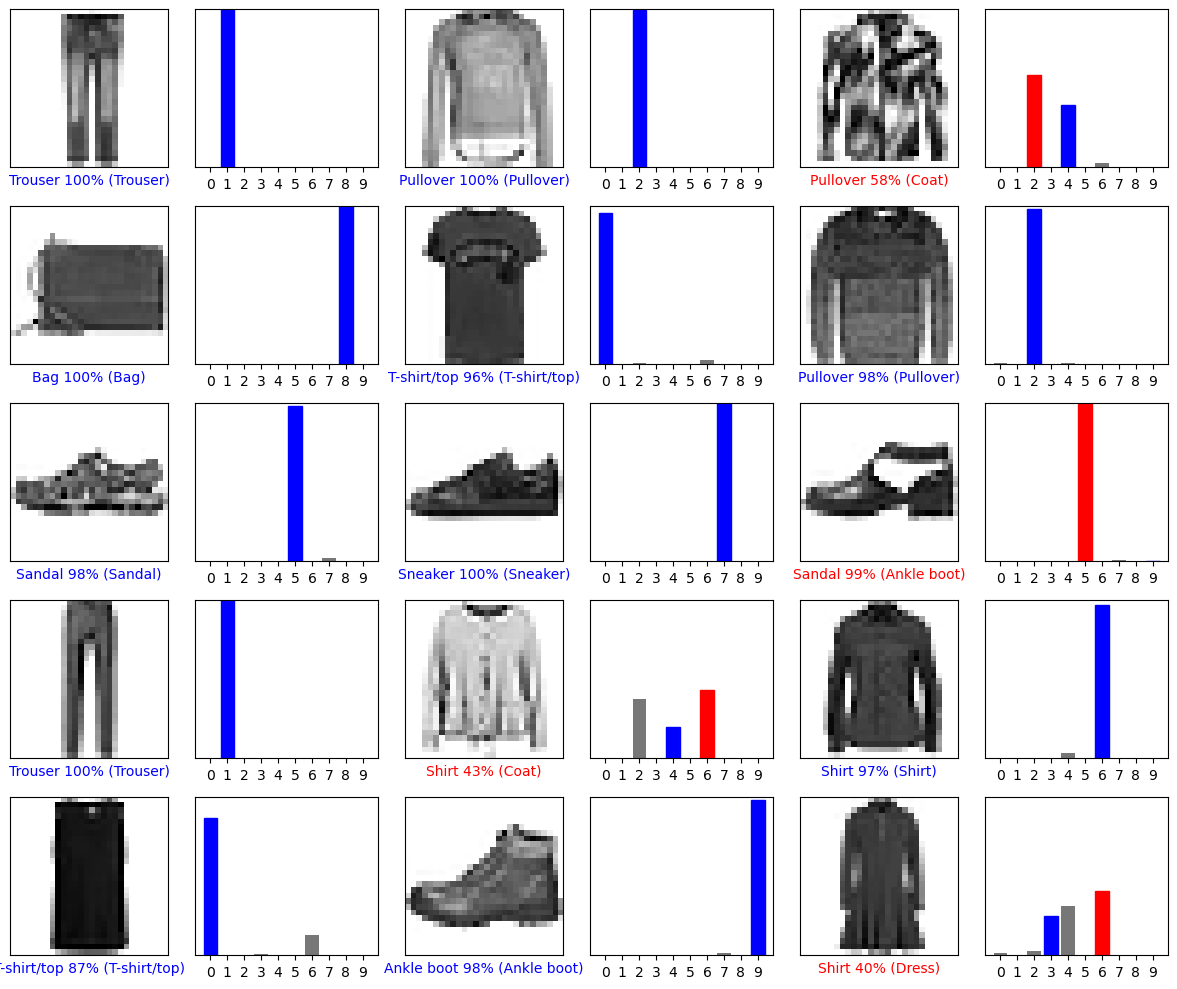

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+15, predictions[i+15], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+15, predictions[i+15], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

Los modelos de tf.keras son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista

In [44]:
# Grab an image from the test dataset.
img = test_images[1]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[3.4020017e-05 2.3443111e-14 9.9764282e-01 9.1339579e-08 1.7037389e-03
  3.9301184e-14 6.1924494e-04 4.9690231e-15 1.6960115e-08 4.1984274e-13]]


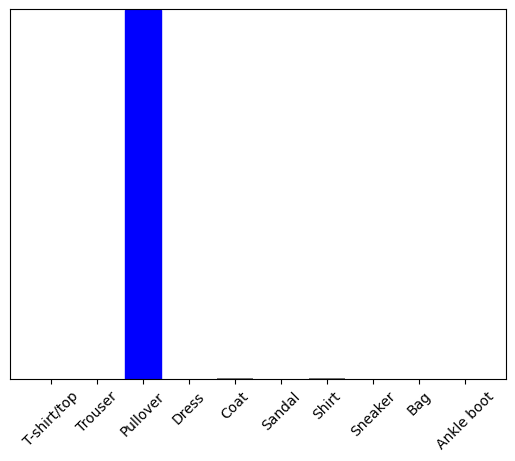

In [46]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Preguntas del taller

1. ¿Porque existe una diferencia entre 'accuracy' o 'loss' en las fases de entrenamiento y pruebas ?
2. ¿Porque considera que algunas de las imagenes no lograron ser categorizadas correctamente? ¿Que las podria diferencias?
3. ¿Que ocurre cuando incrementamos la cantidad de neuronas intermedias de 128 a 500? ¿Que le ocure a la diferencia de los valores de train vs test? Explique su respuesta
4. ¿Que ocurre cuando incrementamos la cantidad de epocas (iteraciones) de 10 a 20? ¿Que le ocure a la diferencia de los valores de train vs test?Explique su respuesta
5. Explique como es la arquitectura del siguiente modelo: